# Exploratory Data Analyses 

#### Import Necessary Libraries

In [90]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Merging 12 months of sales data into a single file

In [91]:
files = [file for file in os.listdir('./sales_data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./sales_data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

#### Read in updated dataframe

In [92]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Order Date,Purchase Address
0,40064,Shoes,M,Sneakers,41.0,brown,1,99.99,17/04/2019 15:58,"Sportlaan 88, 1026PR Apeldoorn"
1,40065,Shoes,F,Ankle Boots,39.0,black,1,119.99,09/04/2019 18:33,"Lindenlaan 58, 1008UV Apeldoorn"
2,40066,Shoes,M,Boots,39.0,green,1,119.99,03/04/2019 07:52,"Hoofdstraat 58, 1037OB Nijmegen"
3,40067,Shoes,M,Loafers,42.0,grey,1,69.99,11/04/2019 17:35,"Lindenlaan 56, 1049DF Breda"
4,40067,Shoes,M,Boots,42.0,brown,1,119.99,11/04/2019 17:35,"Lindenlaan 56, 1049DF Breda"


### Visually inspect data

In [93]:
all_data.columns

Index(['Order ID', 'Category', 'Gender', 'Product', 'Size', 'Color',
       'Quantity Ordered', 'Price each', 'Order Date', 'Purchase Address'],
      dtype='object')

In [94]:
all_data.shape

(18344, 10)

In [95]:
all_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18344 non-null  int64  
 1   Category          18344 non-null  object 
 2   Gender            17764 non-null  object 
 3   Product           18344 non-null  object 
 4   Size              12310 non-null  float64
 5   Color             17764 non-null  object 
 6   Quantity Ordered  18344 non-null  int64  
 7   Price each        18344 non-null  float64
 8   Order Date        18344 non-null  object 
 9   Purchase Address  18344 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8 MB


### Change columns to the correct datatype and lowering memory usage

Memory usage before changing datatypes: 4.8 MB

In [96]:
all_data.memory_usage(deep=True)

Index                    64
Order ID             146752
Category             637759
Gender               615576
Product              676257
Size                 146752
Color                618008
Quantity Ordered     146752
Price each           146752
Order Date           825480
Purchase Address    1109959
dtype: int64

In [97]:
all_data['Category'].unique()

array(['Shoes', 'Bags', 'Accessories'], dtype=object)

In [98]:
all_data['Category'] = all_data['Category'].astype('category')

In [99]:
all_data['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [100]:
all_data['Gender'] = all_data['Gender'].astype('category')

In [101]:
all_data['Product'].unique()

array(['Sneakers', 'Ankle Boots', 'Boots', 'Loafers', 'Backpack',
       'Ballerinas', 'Boat shoes', 'Combat', 'Pumps', 'Shoulderbag',
       'Wedges', 'Clutch', 'Socks', 'Calf Boots', 'Sandals', 'Laptopbag',
       'Sunglasses', 'Wallet', 'Scarf', 'Belt', 'Shopper', 'Handbag',
       'Flip Flops', 'Shoe care', 'Gloves', 'Summerhat'], dtype=object)

In [102]:
all_data['Product'] = all_data['Product'].astype('category')

In [103]:
all_data['Color'].unique()

array(['brown', 'black', 'green', 'grey', 'beige', 'white', 'blue',
       'multicolor', 'red', 'pink', nan, 'silver', 'gold'], dtype=object)

In [104]:
all_data['Color'] = all_data['Color'].astype('category')

In [105]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [106]:
all_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18344 non-null  int64         
 1   Category          18344 non-null  category      
 2   Gender            17764 non-null  category      
 3   Product           18344 non-null  category      
 4   Size              12310 non-null  float64       
 5   Color             17764 non-null  category      
 6   Quantity Ordered  18344 non-null  int64         
 7   Price each        18344 non-null  float64       
 8   Order Date        18344 non-null  datetime64[ns]
 9   Purchase Address  18344 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.8 MB


Memory usages after changing datatypes: 1.8 MB

### Inspect missing values

In [107]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18344 non-null  int64         
 1   Category          18344 non-null  category      
 2   Gender            17764 non-null  category      
 3   Product           18344 non-null  category      
 4   Size              12310 non-null  float64       
 5   Color             17764 non-null  category      
 6   Quantity Ordered  18344 non-null  int64         
 7   Price each        18344 non-null  float64       
 8   Order Date        18344 non-null  datetime64[ns]
 9   Purchase Address  18344 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 861.1+ KB


There are missing values in the columns: 'Gender', 'Size' and 'Color'.

#### 'Gender' column

In [108]:
df['Gender'].value_counts(dropna=False)

F      1067
M       613
NaN      71
Name: Gender, dtype: int64

The 'Gender' column has 71 missing values.

In [117]:
df[df['Gender'].isna()]

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Order Date,Purchase Address
59,46742,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,01/09/2019 12:41,"Rijksweg 37, 1047ZF Zwolle"
105,46774,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,28/09/2019 22:13,"Raadhuisstraat 33, 1088HY Amsterdam"
129,46794,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,30/09/2019 18:21,"Nieuweweg 25, 1043PU Leeuwarden"
149,46810,Accessories,NaN,Shoe care,NaN,NaN,2,8.99,28/09/2019 22:23,"Tuinstraat 94, 1030CF Almere"
158,46817,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,06/09/2019 19:08,"Margrietstraat 40, 1024ER Amsterdam"
...,...,...,...,...,...,...,...,...,...,...
1479,47802,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,28/09/2019 14:04,"Beatrixstraat 74, 1072VD Alphen aan den Rijn"
1525,47836,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,25/09/2019 14:28,"Lindenlaan 96, 1041YE Leiden"
1530,47840,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,27/09/2019 11:18,"Kastanjelaan 89, 1057MV Rotterdam"
1596,47890,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,26/09/2019 15:48,"Parklaan 14, 1093BQ Utrecht"


At first sight it looks like there are only missing values for 'Gender' in the category 'Accessory'.

In [118]:
df.groupby(['Category', 'Product'])['Gender'].value_counts(dropna=False)

Category     Product      Gender
Accessories  Belt         F          21
                          M          14
             Scarf        F          22
                          M          20
             Shoe care    NaN        71
             Socks        F          43
                          M          24
             Sunglasses   M          18
                          F          15
             Wallet       F          11
                          M          10
Bags         Backpack     F          41
                          M          36
             Clutch       F          32
             Handbag      F          31
             Laptopbag    M          42
                          F          21
             Shopper      F          38
             Shoulderbag  M          38
                          F          22
Shoes        Ankle Boots  F          67
             Ballerinas   F         140
             Boat shoes   M          30
             Boots        M          75
       

Further inspection shows that all the missing values for 'Gender' are with the product 'Shoe care'. We can conclude that the product 'Shoe care' doesn't have a specific gender.

In [119]:
df['Size'].value_counts(dropna=False)

NaN     570
39.0    236
38.0    206
40.0    193
37.0    153
41.0    142
36.0    108
42.0     92
35.0     46
43.0      4
34.0      1
Name: Size, dtype: int64

The 'Size' column has 570 missing values.

In [120]:
df.groupby('Category')['Size'].value_counts(dropna=False)

Category     Size
Accessories  NaN     269
Bags         NaN     301
Shoes        39.0    236
             38.0    206
             40.0    193
             37.0    153
             41.0    142
             36.0    108
             42.0     92
             35.0     46
             43.0      4
             34.0      1
Name: Size, dtype: int64

Only the category 'Shoes' has assigned sizes. The categories 'Accessories' and 'Bags' have missing values for 'Size'.

In [121]:
df['Color'].value_counts(dropna=False)

black         358
brown         347
grey          345
beige         271
multicolor    122
white          94
NaN            71
pink           30
red            29
blue           29
green          27
gold           15
silver         13
Name: Color, dtype: int64

The 'Color' column has 71 missing values.

In [122]:
nan_color = df[df['Color'].isna()]
nan_color.groupby(['Category', 'Product'])['Color'].value_counts(dropna=False)

Category     Product    Color
Accessories  Shoe care  NaN      71
Name: Color, dtype: int64

Only the product 'Shoe care' has missing values for 'Color'.

### Augment data with aditional columns

#### Make the column 'Order Date' the index

In [123]:
all_data.set_index('Order Date', inplace=True)

KeyError: "None of ['Order Date'] are in the columns"

#### Create a 'Total price' column

In [124]:
all_data['Total price'] = all_data['Quantity Ordered'] * all_data['Price each']
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price
Order Date,,,,,,,,,,
2019-04-17 15:58:00,40064,Shoes,M,Sneakers,41.0,brown,1,99.99,"Sportlaan 88, 1026PR Apeldoorn",99.99
2019-09-04 18:33:00,40065,Shoes,F,Ankle Boots,39.0,black,1,119.99,"Lindenlaan 58, 1008UV Apeldoorn",119.99
2019-03-04 07:52:00,40066,Shoes,M,Boots,39.0,green,1,119.99,"Hoofdstraat 58, 1037OB Nijmegen",119.99
2019-11-04 17:35:00,40067,Shoes,M,Loafers,42.0,grey,1,69.99,"Lindenlaan 56, 1049DF Breda",69.99
2019-11-04 17:35:00,40067,Shoes,M,Boots,42.0,brown,1,119.99,"Lindenlaan 56, 1049DF Breda",119.99


#### Create a 'City' column

In [125]:
def get_city(address):
    address = address.split(',')[1]
    address = address.split()[1:]
    return ' '.join(map(str, address))

In [126]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-17 15:58:00,40064,Shoes,M,Sneakers,41.0,brown,1,99.99,"Sportlaan 88, 1026PR Apeldoorn",99.99,Apeldoorn
2019-09-04 18:33:00,40065,Shoes,F,Ankle Boots,39.0,black,1,119.99,"Lindenlaan 58, 1008UV Apeldoorn",119.99,Apeldoorn
2019-03-04 07:52:00,40066,Shoes,M,Boots,39.0,green,1,119.99,"Hoofdstraat 58, 1037OB Nijmegen",119.99,Nijmegen
2019-11-04 17:35:00,40067,Shoes,M,Loafers,42.0,grey,1,69.99,"Lindenlaan 56, 1049DF Breda",69.99,Breda
2019-11-04 17:35:00,40067,Shoes,M,Boots,42.0,brown,1,119.99,"Lindenlaan 56, 1049DF Breda",119.99,Breda


#### How much money was earned in 2019?

In [127]:
total_2019 = all_data['Total price'].sum().round(2)
total_2019

1386651.14

#### What was the best month for sales? How much was earned that month?

In [128]:
month_data = all_data.groupby(all_data.index.month)['Total price'].sum()

In [129]:
month_data.sort_values(ascending=False)

Order Date
10    133194.90
12    128436.73
6     124213.16
9     124133.06
5     119012.13
3     114962.04
7     114310.62
4     114310.04
8     112590.60
11    112319.30
1     100208.70
2      88959.86
Name: Total price, dtype: float64

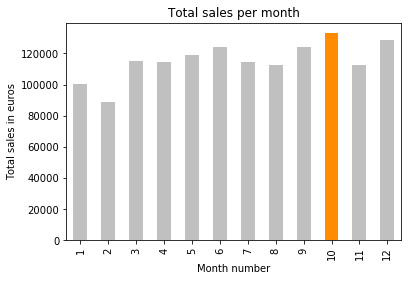

In [130]:
color = ['darkorange' if month == 10 else 'silver' for month in month_data.index]
fig, ax = plt.subplots()
ax = month_data.plot(kind='bar', color=color)
ax.set_xlabel('Month number')
ax.set_ylabel('Total sales in euros')
ax.set_title('Total sales per month')
plt.show()

October was the best month for sales. In October the store earned €133194,90.

### What city had the highest number of sales?

In [137]:
sales_city = all_data.groupby('City')['Total price'].sum()
sales_city.sort_values(ascending=False)

City
Amsterdam              196010.51
Rotterdam              143765.85
Den Haag               123071.06
Utrecht                 79652.99
Almere                  53463.52
Groningen               52516.95
Eindhoven               48057.34
Tilburg                 42469.93
Breda                   41757.32
Apeldoorn               40181.79
Nijmegen                39178.79
Haarlem                 34847.72
Enschede                34815.36
's-Hertogenbosch        34595.23
Arnhem                  33539.56
Amersfoort              33274.56
Zaandam                 31441.60
Zoetermeer              31189.30
Leeuwarden              26947.26
Ede                     26909.60
Alphen aan den Rijn     26355.59
Dordrecht               25882.21
Maastricht              25868.74
Emmen                   25102.89
Leiden                  25078.08
Zwolle                  24867.14
Venlo                   22900.46
Alkmaar                 21762.50
Delft                   21067.88
Deventer                20079.41
Name:

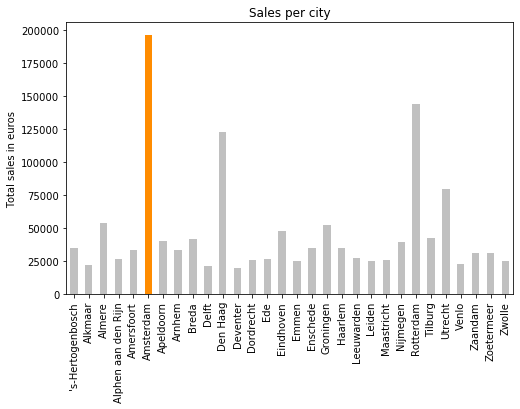

In [138]:
color = ['darkorange' if city == 'Amsterdam' else 'silver' for city in sales_city.index]
fig, ax = plt.subplots(figsize=[8,5])
ax = sales_city.plot(kind='bar', color=color)
ax.set_xlabel('')
ax.set_ylabel('Total sales in euros')
ax.set_title('Sales per city')
plt.show()

### What time should advertisements be displayed to maximize likelihood of customer's buying a product?

In [139]:
hour_data = all_data.groupby(all_data.index.hour)['Order ID'].nunique()
hour_data

Order Date
0     299
1     166
2      86
3      50
4      63
5      94
6     181
7     298
8     453
9     648
10    771
11    910
12    894
13    937
14    847
15    764
16    746
17    820
18    877
19    959
20    924
21    842
22    690
23    476
Name: Order ID, dtype: int64

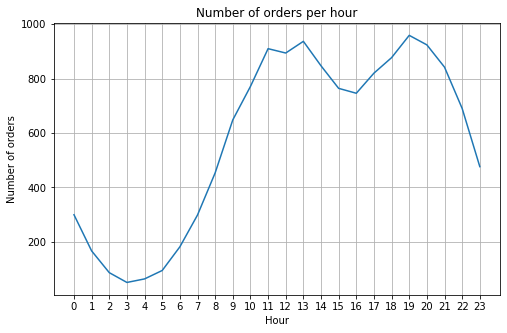

In [140]:
fig, ax = plt.subplots(figsize=[8,5])
ax = hour_data.plot()
ax.set_xticks(hour_data.index)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of orders')
ax.set_title('Number of orders per hour')
ax.grid()
plt.show()

Most sales occur between 11am-12pm and 6pm-8pm.

### Women shoes

In [141]:
womens_shoes = all_data[(all_data['Category'] == 'Shoes') & (all_data['Gender'] == 'F')]
womens_shoes.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-09-04 18:33:00,40065,Shoes,F,Ankle Boots,39.0,black,1,119.99,"Lindenlaan 58, 1008UV Apeldoorn",119.99,Apeldoorn
2019-04-13 16:28:00,40071,Shoes,F,Ballerinas,35.0,black,1,79.95,"Sportlaan 60, 1050JA Rotterdam",79.95,Rotterdam
2019-04-28 22:06:00,40073,Shoes,F,Pumps,37.0,black,1,89.99,"Frans Halsstraat 95, 1027IG Rotterdam",89.99,Rotterdam
2019-04-21 10:31:00,40074,Shoes,F,Sneakers,39.0,black,1,99.99,"Leliestraat 60, 1002BF Utrecht",99.99,Utrecht
2019-04-15 22:08:00,40078,Shoes,F,Wedges,40.0,black,1,69.95,"Parklaan 44, 1047BT Amsterdam",69.95,Amsterdam


In [142]:
product_count = womens_shoes.groupby('Product', observed=True)['Quantity Ordered'].sum()

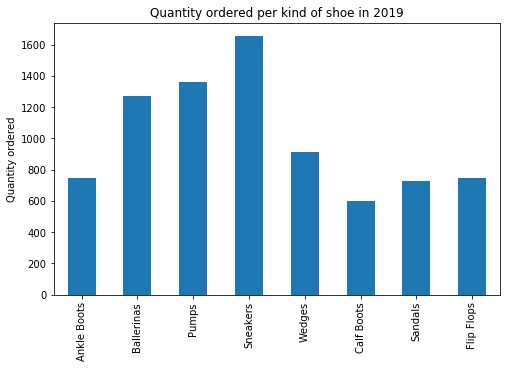

In [143]:
fig, ax = plt.subplots(figsize=[8,5])
ax = product_count.plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Quantity ordered')
ax.set_title('Quantity ordered per kind of shoe in 2019')
plt.show()

In [144]:
product_time = pd.pivot_table(womens_shoes, values='Quantity Ordered', columns='Product', index=womens_shoes.index.month, aggfunc='sum')
product_time

Product,Ankle Boots,Ballerinas,Calf Boots,Flip Flops,Pumps,Sandals,Sneakers,Wedges
Order Date,,,,,,,,
1,84,62,81,32,81,38,107,57
2,47,64,35,32,97,31,126,50
3,45,117,27,40,117,28,183,82
4,49,128,37,40,123,44,150,79
5,40,140,29,145,99,127,98,111
6,49,126,30,133,124,144,103,113
7,38,129,32,124,92,128,106,92
8,54,104,35,45,128,36,160,58
9,58,114,38,46,140,32,177,99


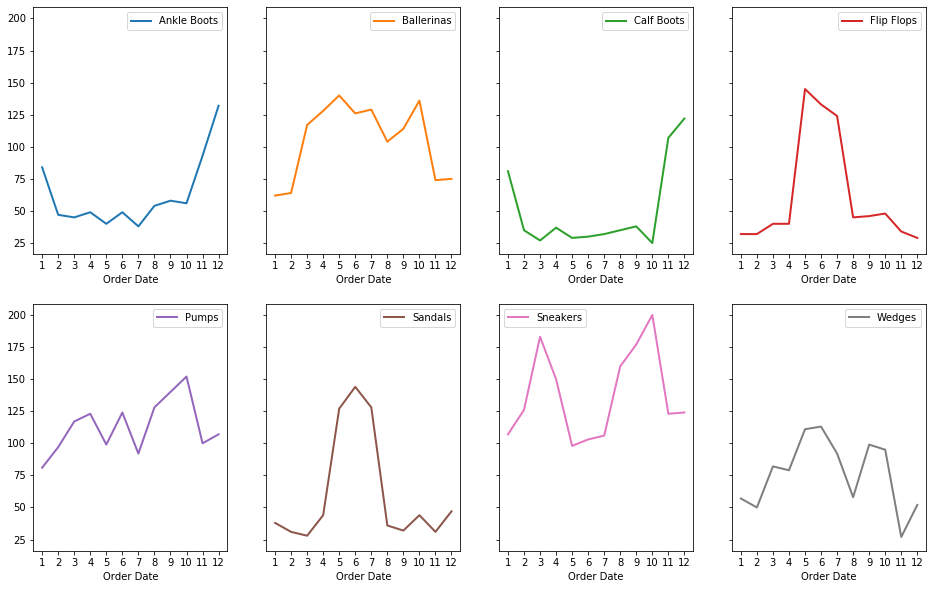

In [145]:
product_time.plot(subplots=True, layout=(2,4), figsize=(16,10), linewidth=2, xticks=product_time.index, 
                  sharex=False, sharey=True)
plt.show()

### Mens shoes

In [146]:
mens_shoes = all_data[(all_data['Category'] == 'Shoes') & (all_data['Gender'] == 'M')]
mens_shoes.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-17 15:58:00,40064,Shoes,M,Sneakers,41.0,brown,1,99.99,"Sportlaan 88, 1026PR Apeldoorn",99.99,Apeldoorn
2019-03-04 07:52:00,40066,Shoes,M,Boots,39.0,green,1,119.99,"Hoofdstraat 58, 1037OB Nijmegen",119.99,Nijmegen
2019-11-04 17:35:00,40067,Shoes,M,Loafers,42.0,grey,1,69.99,"Lindenlaan 56, 1049DF Breda",69.99,Breda
2019-11-04 17:35:00,40067,Shoes,M,Boots,42.0,brown,1,119.99,"Lindenlaan 56, 1049DF Breda",119.99,Breda
2019-04-23 13:45:00,40069,Shoes,M,Sneakers,35.0,brown,1,99.99,"Kastanjelaan 80, 1000XT Amsterdam",99.99,Amsterdam


In [147]:
product_count = mens_shoes.groupby('Product', observed=True)['Quantity Ordered'].sum()

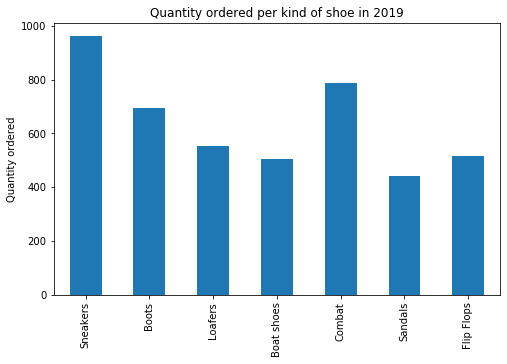

In [148]:
fig, ax = plt.subplots(figsize=[8,5])
ax = product_count.plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Quantity ordered')
ax.set_title('Quantity ordered per kind of shoe in 2019')
plt.show()

In [149]:
product_time = pd.pivot_table(mens_shoes, values='Quantity Ordered', columns='Product', index=mens_shoes.index.month, aggfunc='sum')
product_time

Product,Boat shoes,Boots,Combat,Flip Flops,Loafers,Sandals,Sneakers
Order Date,,,,,,,
1,25,74,73,29,30,13,42
2,30,39,54,21,34,18,84
3,42,62,67,23,39,24,91
4,29,63,94,22,40,20,97
5,78,18,33,107,68,69,72
6,65,26,30,96,61,85,60
7,76,34,27,94,62,84,77
8,23,56,84,26,59,20,84
9,38,74,87,27,51,18,100


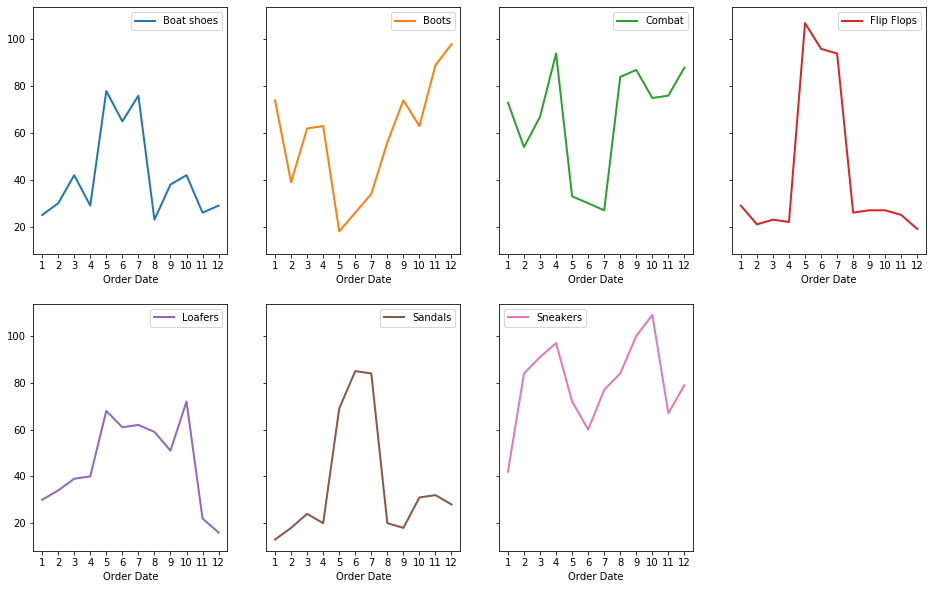

In [150]:
product_time.plot(subplots=True, layout=(2,4), figsize=(16,10), linewidth=2, xticks=product_time.index, 
                  sharex=False, sharey=True)
plt.show()

 ### More than one product sold per order

In [151]:
multiple = all_data[(all_data.duplicated(subset=['Order ID', 'Product'], keep=False)) & (all_data['Category'] == 'Shoes')]
multiple

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-06-04 10:42:00,40092,Shoes,M,Loafers,38.0,beige,1,69.99,"Parklaan 37, 1018DA Arnhem",69.99,Arnhem
2019-06-04 10:42:00,40092,Shoes,M,Loafers,37.0,beige,1,69.99,"Parklaan 37, 1018DA Arnhem",69.99,Arnhem
2019-04-18 14:17:00,40120,Shoes,F,Ankle Boots,35.0,brown,1,119.99,"Parklaan 1, 1082SP Utrecht",119.99,Utrecht
2019-04-18 14:17:00,40120,Shoes,F,Ankle Boots,36.0,brown,1,119.99,"Parklaan 1, 1082SP Utrecht",119.99,Utrecht
2019-04-26 02:07:00,40133,Shoes,M,Sneakers,39.0,black,1,99.99,"Molenstraat 86, 1025ND Zoetermeer",99.99,Zoetermeer
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09 08:17:00,47990,Shoes,M,Loafers,35.0,beige,1,69.99,"Schoolstraat 17, 1090MD Almere",69.99,Almere
2019-09-21 18:51:00,47993,Shoes,F,Sneakers,41.0,black,1,99.99,"Esdoornstraat 2, 1084SE Tilburg",99.99,Tilburg
2019-09-21 18:51:00,47993,Shoes,F,Sneakers,41.0,brown,1,99.99,"Esdoornstraat 2, 1084SE Tilburg",99.99,Tilburg
